In [0]:
#Run if you need to clear all your resources
!kill -9 -1

In [1]:
#Upgrade to the latest scipy to get rid of a warning message in later installs
!pip install --upgrade scipy

    100% |████████████████████████████████| 31.2MB 1.5MB/s 
Requirement not upgraded as not directly required: numpy>=1.8.2 in /usr/local/lib/python3.6/dist-packages (from scipy) (1.14.5)
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


In [2]:
#Install the version of pytorch required for fastai (0.4.0 also works but you get warning messages)
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision

    100% |████████████████████████████████| 592.3MB 48.6MB/s 


    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 2.0MB 8.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [3]:
#Instal fastai
!pip install fastai

    100% |████████████████████████████████| 122kB 3.5MB/s 
    100% |████████████████████████████████| 51kB 7.4MB/s 
    100% |████████████████████████████████| 112kB 4.1MB/s 
    100% |████████████████████████████████| 3.4MB 9.2MB/s 
    100% |████████████████████████████████| 174kB 15.4MB/s 
    100% |████████████████████████████████| 1.5MB 16.5MB/s 


    100% |████████████████████████████████| 2.2MB 11.0MB/s 
    100% |████████████████████████████████| 51kB 20.8MB/s 
    100% |████████████████████████████████| 112kB 20.5MB/s 
    100% |████████████████████████████████| 13.7MB 3.1MB/s 
    100% |████████████████████████████████| 71kB 21.5MB/s 
    100% |████████████████████████████████| 92kB 23.8MB/s 
    100% |████████████████████████████████| 81kB 22.8MB/s 


  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
Successfully built feather-format bcolz torchtext pandas-summary


In [0]:
#RESTART RUNTIME AFTER COMPLETING THE ABOVE INSTALLS

In [2]:
#Just checking to see what directories are visible
!ls

datalab


In [0]:
#Create directory for holding all the data
!mkdir data

In [4]:
#Just checking that the data directory was installed
!ls

data  datalab


In [5]:
#Download the dataset
!wget http://files.fast.ai/data/dogscats.zip

--2018-06-29 06:22:16--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M   111MB/s    in 7.6s    

2018-06-29 06:22:24 (107 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [6]:
#Make sure the dataset downloaded
!ls

data  datalab  dogscats.zip


In [0]:
#Unzip dataset to data directory
!unzip -qq dogscats.zip -d data/

In [0]:
#Configure plots to display inside the notebook
%matplotlib inline

In [0]:
#Imports
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
#path to the data
PATH = "data/dogscats/"

#size of the images (224x224)
sz=224


In [11]:
#Just make sure cuda is available. If False is returned then go into you Runtime setting and enable GPU
torch.cuda.is_available()

True

In [12]:
#Just checking for cudnn. If False is returned then go into you Runtime setting and enable GPU
torch.backends.cudnn.enabled

True

In [13]:
#Taking a quick peak inside the data/dogscats directory
os.listdir(PATH)

['sample', 'train', 'test1', 'models', 'valid']

In [14]:
#Taking a quick peaking inside the validation folder, subfolders names are the labels (categories to classify)
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [15]:
#Selecting a few of the cat images from the validation set
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.6440.jpg',
 'cat.7657.jpg',
 'cat.1282.jpg',
 'cat.10601.jpg',
 'cat.7492.jpg']

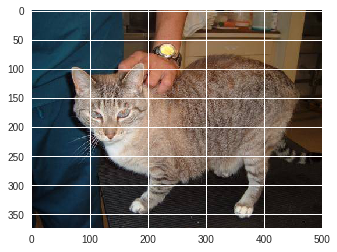

In [16]:
#Displaying one of the cat images, notice that is isn't exactly 224x224
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [17]:
img.shape

(374, 500, 3)

In [0]:
# Uncomment the below if you need to reset your precomputed activations
shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

In [19]:
#Define our pretrained network architecture
arch=resnet34

#Load our date from disk, images will be nomalized
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

#Create your model from a pretrained (with ImageNet) resenet architecture. Add new fully connected layers at the end.
learn = ConvLearner.pretrained(arch, data, precompute=True)

#Train for 5 epochs with a learning rate of 0.01
learn.fit(0.01, 5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 31204777.94it/s]


100%|██████████| 32/32 [00:14<00:00,  2.23it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.057548   0.02817    0.9915    
    1      0.046913   0.030499   0.99      
 11%|█▏        | 41/360 [00:01<00:13, 23.30it/s, loss=0.0477]

    2      0.047288   0.023622   0.9905    
    3      0.045434   0.027956   0.9905    
 53%|█████▎    | 192/360 [00:05<00:04, 33.79it/s, loss=0.0379]

    4      0.040741   0.02722    0.9895    



[array([0.02722]), 0.9895]

In [20]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [21]:
log_preds[:10]

array([[-0.00027, -8.2186 ],
       [-0.00263, -5.94224],
       [-0.00013, -8.91953],
       [-0.00089, -7.01989],
       [-0.00013, -8.91783],
       [-0.00011, -9.15234],
       [-0.00039, -7.84617],
       [-0.00007, -9.51415],
       [-0.00065, -7.34263],
       [-0.00036, -7.93802]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): 
  return np.random.choice(np.where(mask)[0], 4, replace=False)

def rand_by_correct(is_correct): 
  return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
  imgs = np.stack([data.val_ds[x][0] for x in idxs])
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows, len(ims)//rows, i+1)
    sp.axis('Off')
    if titles is not None: 
      sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): 
  return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
  imgs = [load_img_id(data.val_ds,x) for x in idxs]
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


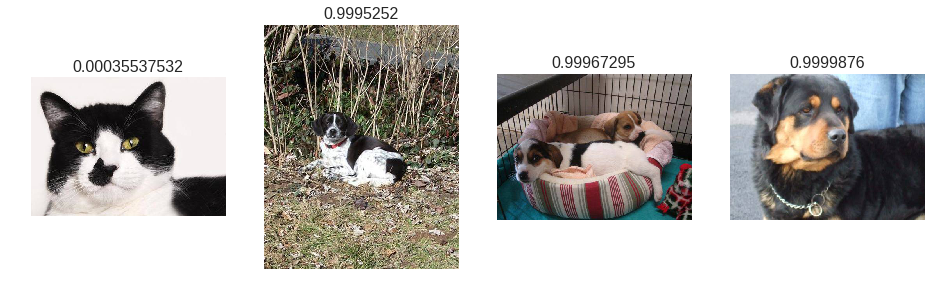

In [27]:
# A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


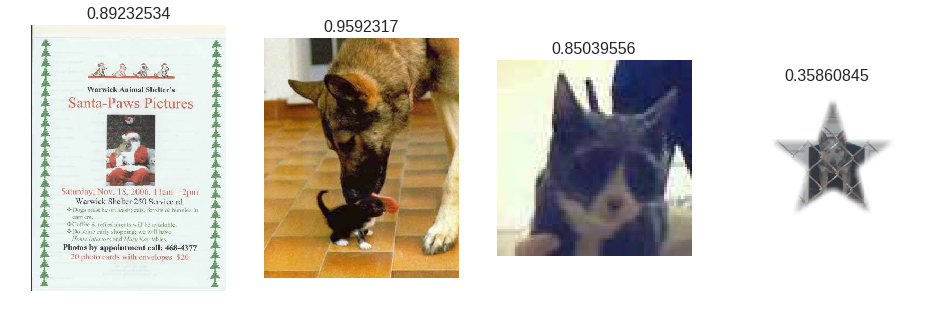

In [28]:
# A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


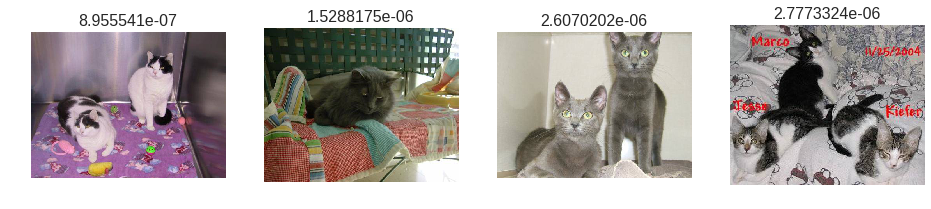

In [30]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")


Most correct dogs


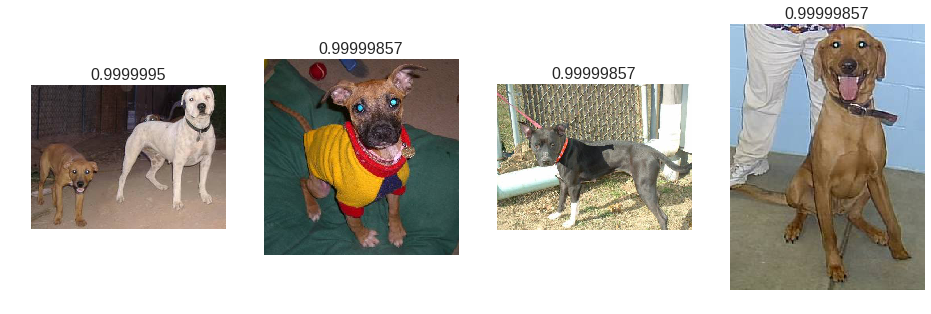

In [31]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


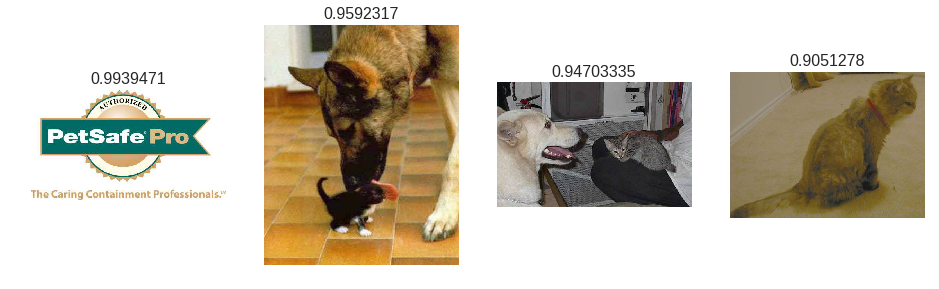

In [32]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


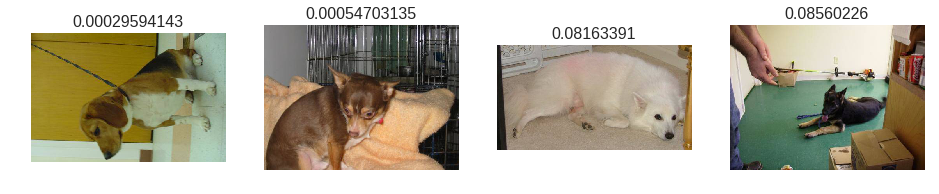

In [33]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


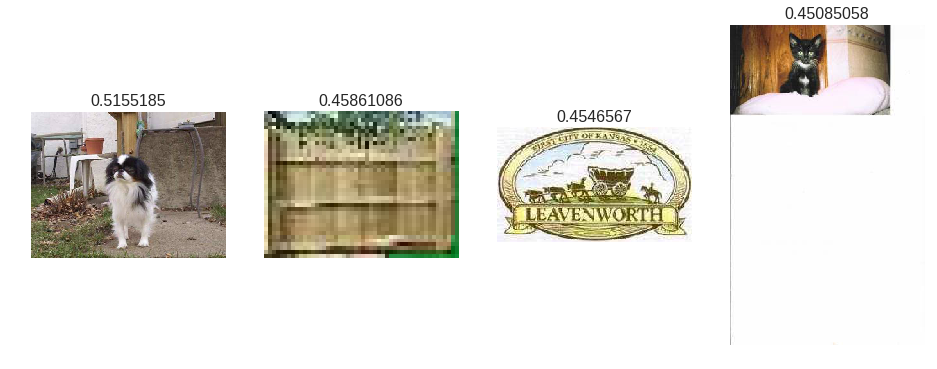

In [34]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
#Reseting the model to show off the learning rate finder
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [36]:
#Configuring the learning rate finder
lrf=learn.lr_find()

 83%|████████▎ | 298/360 [00:08<00:01, 36.84it/s, loss=0.479]


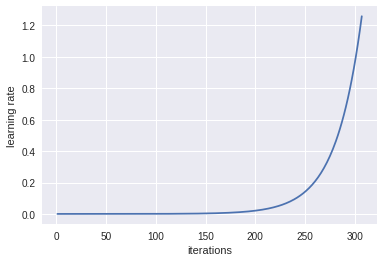

In [37]:
#Plotting the exponential growth of the learning rate
learn.sched.plot_lr()

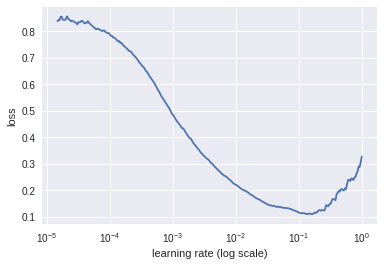

In [38]:
#Plotting loss vs. learning rate, we are interested in the learning rate value just before we hit our minimum loss
learn.sched.plot()

In [0]:
#Next we should explore data augmentation during training
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
#Method to help us visualize what data augmentation is doing
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
#Generate 6 augmented version of an image
ims = np.stack([get_augs() for i in range(6)])

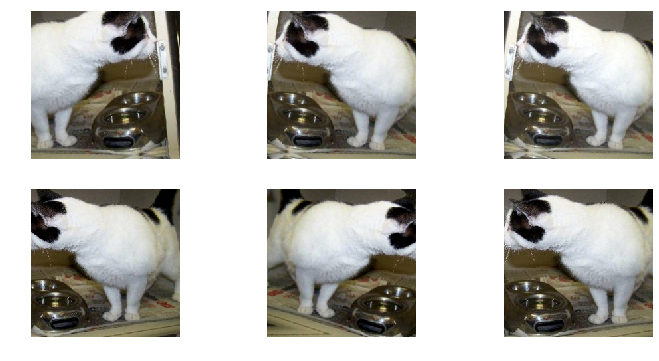

In [42]:
plots(ims, rows=2)

In [0]:
#Now create our data set with data augmentation enabled
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [44]:
#Run a single epoch, data augmentation isn't being utilized just yet
learn.fit(1e-2, 1)


epoch      trn_loss   val_loss   accuracy   
    0      0.063908   0.030868   0.989     



[array([0.03087]), 0.989]

In [0]:
#Now turn precompute off to take advantage of of data augmentation
learn.precompute=False

In [46]:
#Train for 3 more epochs, might be a little slower because were are not precomputing activations
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.049924   0.030269   0.9895    
 51%|█████     | 184/360 [01:33<01:29,  1.97it/s, loss=0.0496]

    1      0.035242   0.02847    0.991     
    2      0.042522   0.027201   0.991     



[array([0.0272]), 0.991]

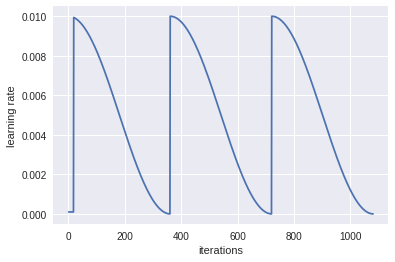

In [47]:
#The cycle_len option above defines how often the learning rate resets (SGDR)
learn.sched.plot_lr()

In [0]:
#Now we may want to train our early layers, so we unfreeze them
learn.unfreeze()

In [0]:
#The network is broken into thirds and we can control the learning rate in each section
lr=np.array([1e-4,1e-3,1e-2])

In [50]:
#Run for a few more epochs, training times will be much slower now that the early layers are being trained
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.047235   0.027274   0.989     
 51%|█████     | 184/360 [03:17<03:08,  1.07s/it, loss=0.0464]

    1      0.037358   0.021161   0.9925    
    2      0.03514    0.022246   0.9925    



[array([0.02225]), 0.9925]

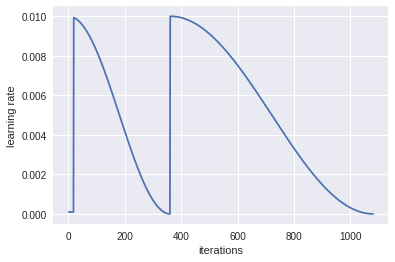

In [51]:
#Notice that the learning rate restarts are not happening at the epoch boundaries (resutl of cycle_mult parameter)
learn.sched.plot_lr()

In [52]:
#We can one more thing to improve our accuracy, Test Time Augmentation (TTA)
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [53]:
#Final accuracy
accuracy_np(probs, y)

0.994

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [0]:
#Now we can visualize our results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[996   4]
 [  8 992]]


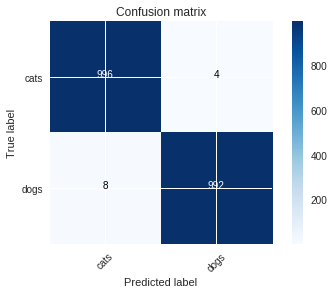

In [56]:

plot_confusion_matrix(cm, data.classes)